In [1]:
import tensorflow as tf
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), 'Physical GPUs,', len(logical_gpus), 'Logical GPUs')
    except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


In [4]:
df= pd.read_csv('Data/train.csv')
#df = df[:1000]
all_id = np.array(df['Id'])
len(all_id)

9912

In [5]:
IMG_SIZE = 128
colours = 3
pictures = np.zeros((len(all_id), IMG_SIZE, IMG_SIZE, colours))
pictures.shape

(9912, 128, 128, 3)

In [6]:
for i, data_id in tqdm.tqdm(enumerate(all_id)):
    img = cv2.cvtColor(cv2.imread(f"Data/train/{df['Id'][i]}.jpg"), cv2.COLOR_BGR2RGB)
    new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    pictures[i] = new_img/255
#     plt.imshow(pictures[i])
#     plt.savefig(f'picture{i}.png')

9912it [01:25, 116.49it/s]


In [7]:
X_train_full, X_test, y_train_full, y_test = train_test_split(pictures, df['Pawpularity'], test_size=0.2, random_state=42)

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
X_train.shape, X_valid.shape, X_test.shape

((5946, 128, 128, 3), (1983, 128, 128, 3), (1983, 128, 128, 3))

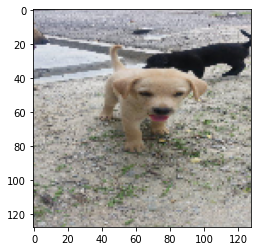

In [9]:
plt.imshow(pictures[0])

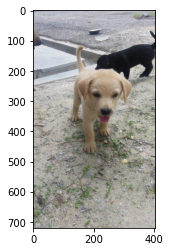

In [10]:
plt.imshow(cv2.cvtColor(cv2.imread(f"Data/train/{df['Id'][0]}.jpg"), cv2.COLOR_BGR2RGB))

In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[IMG_SIZE, IMG_SIZE, 3]),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='relu')
])

model_2.compile(loss=tf.keras.losses.mae, optimizer="nadam", metrics=["mse"])

history_1 = model_2.fit(X_train, y_train, epochs=100)

Train on 5946 samples
Epoch 1/100
5946/5946 [==============================] - 31s 5ms/sample - loss: 20.4528 - mse: 1483.7659
Epoch 2/100
5946/5946 [==============================] - 22s 4ms/sample - loss: 16.9772 - mse: 539.8234
Epoch 3/100
5946/5946 [==============================] - 21s 4ms/sample - loss: 16.7242 - mse: 520.3057
Epoch 4/100
5946/5946 [==============================] - 21s 4ms/sample - loss: 22.1802 - mse: 1343.3423
Epoch 5/100
5946/5946 [==============================] - 21s 4ms/sample - loss: 17.4137 - mse: 558.0772
Epoch 6/100
5946/5946 [==============================] - 21s 4ms/sample - loss: 16.9283 - mse: 532.5690
Epoch 7/100
5946/5946 [==============================] - 21s 4ms/sample - loss: 16.8443 - mse: 530.8798
Epoch 8/100
5946/5946 [==============================] - 21s 4ms/sample - loss: 16.8567 - mse: 526.2062
Epoch 9/100
5946/5946 [==============================] - 21s 4ms/sample - loss: 17.2418 - mse: 624.7526
Epoch 10/100
5946/5946 [================

In [12]:
mean_squared_error(y_test, model_2.predict(X_test))

470.88057170035023

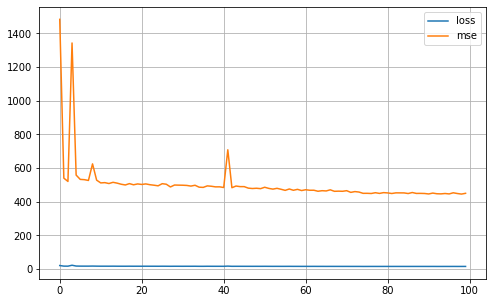

In [13]:
pd.DataFrame(history_1.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()